# Logistic Regression Project 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualization Tasks

**Bar plot that shows the total counts per target value.**

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

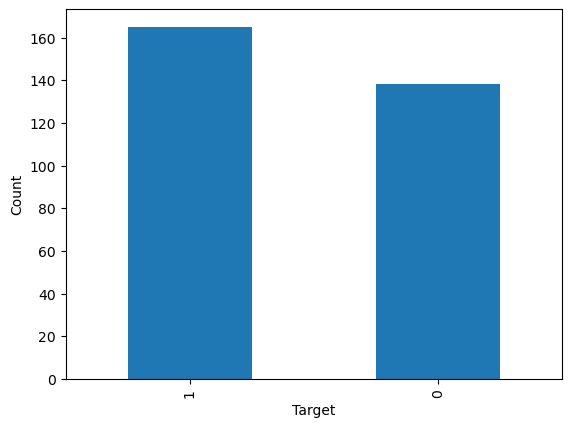

In [8]:
plot = df['target'].value_counts().plot(kind='bar')
plot.set_ylabel("Count")
plot.set_xlabel("Target")
plt.show()

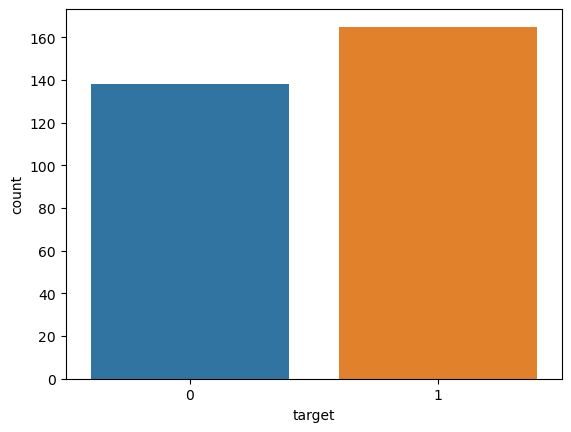

In [9]:
sns.countplot(x='target',data=df)
plt.show()

**Pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']

<Figure size 640x480 with 0 Axes>

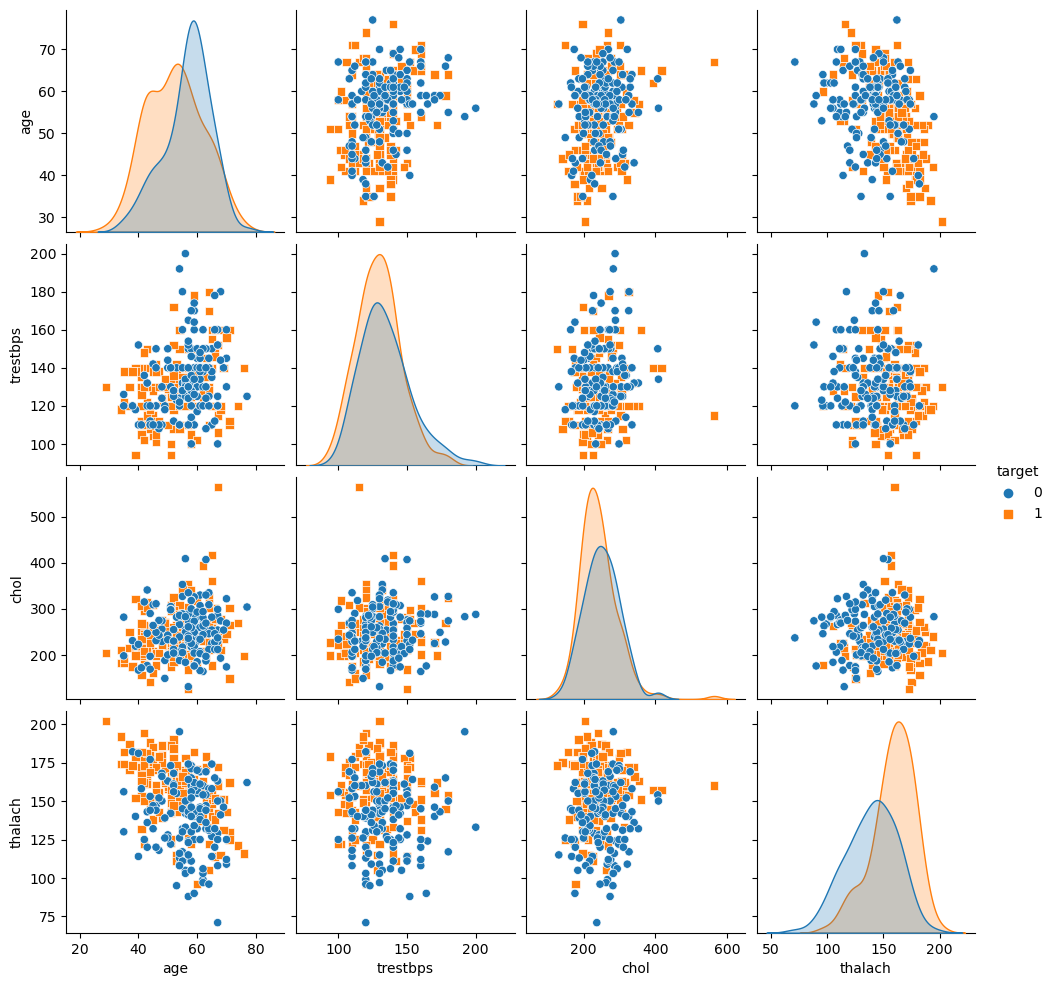

In [10]:
plt.figure()
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue = "target", markers=["o", "s"])
plt.show()

**Heatmap that displays the correlation between all the columns.**

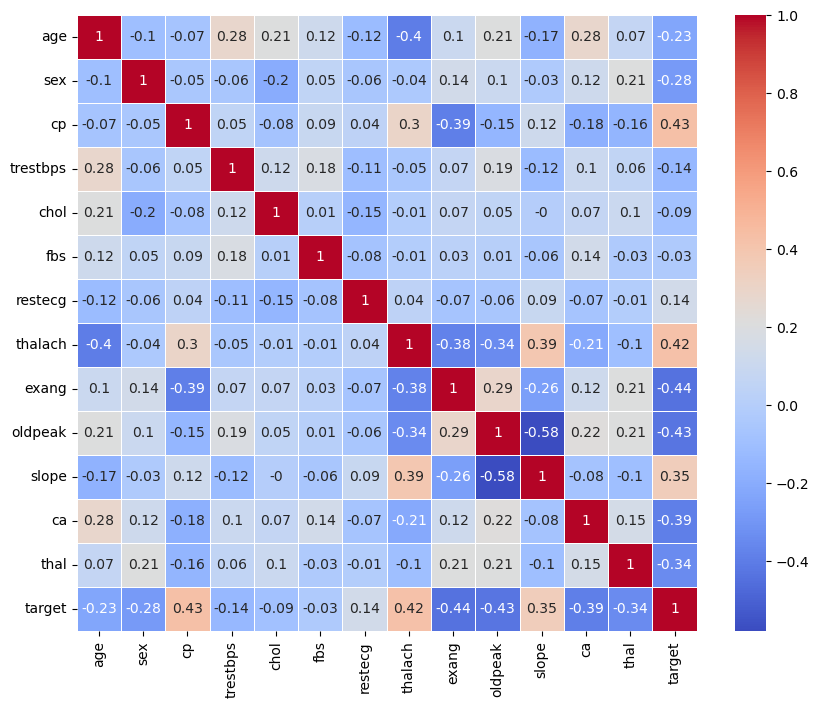

In [11]:
fig, ax = plt.subplots(figsize=(10,8))  
np.round(df.corr(), 2)
sns.heatmap(np.round(df.corr(), 2), annot = True, linewidths=.5, ax=ax, cmap= 'coolwarm')
plt.show()

----
----

# Machine Learning

## Train | Test Split and Scaling

**Separate the features from the labels into 2 objects, X and y.**

In [12]:
X = df.drop('target', axis = 1)
y = df['target']

**Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
scaled_X_train

array([[ 1.04970247,  0.69737995,  1.97993226, ..., -0.67167968,
        -0.71422572, -0.4842146 ],
       [ 0.61644136,  0.69737995, -0.94692412, ...,  0.9451068 ,
         1.23823052,  1.14178999],
       [-0.68334197,  0.69737995,  0.02869467, ..., -2.28846615,
        -0.71422572,  1.14178999],
       ...,
       [-0.89997253,  0.69737995,  0.02869467, ...,  0.9451068 ,
        -0.71422572,  1.14178999],
       [-1.44154891,  0.69737995,  0.02869467, ..., -0.67167968,
        -0.71422572, -2.11021919],
       [-0.68334197, -1.43393855,  1.00431346, ...,  0.9451068 ,
        -0.71422572, -0.4842146 ]])

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [16]:
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV(cv=5, random_state=101).fit(scaled_X_train, y_train)
log_model

LogisticRegressionCV(cv=5, random_state=101)

**C value** |

In [17]:
log_model.C_

array([0.04641589])

In [18]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 101,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeffecients

**Report back the model's coefficients.**

In [19]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [20]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [21]:
coefs = coefs.sort_values()

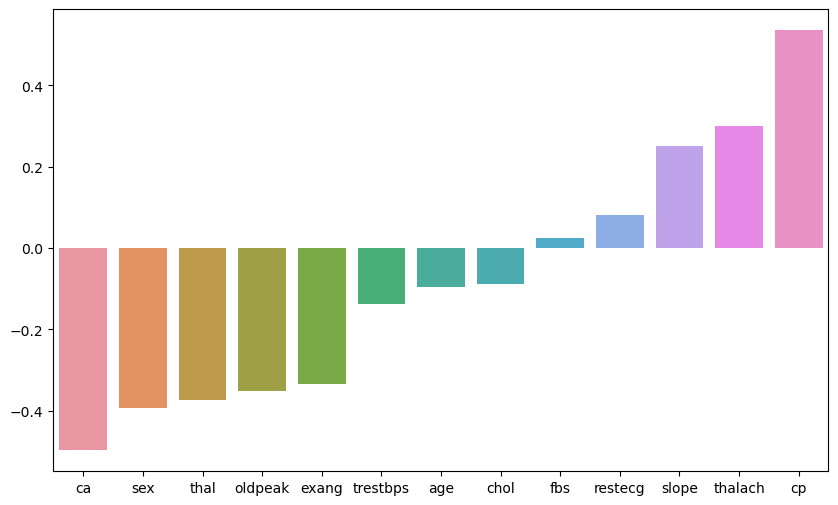

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.8387096774193549

In [26]:
confusion_matrix_ = confusion_matrix(y_test,y_pred)
print(confusion_matrix_)

[[12  3]
 [ 2 14]]


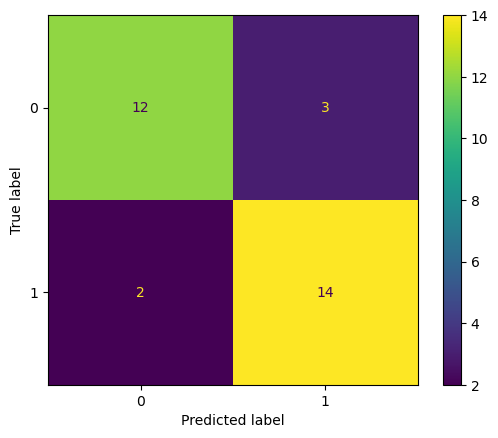

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(confusion_matrix_)
matrix.plot()
plt.show()

In [35]:
TrueNegative, FalsePositive, FalseNegative, TruePositive = confusion_matrix(y_test.tolist(), y_pred.tolist()).ravel()
print(TrueNegative, FalsePositive, FalseNegative, TruePositive)

12 3 2 14


In [36]:
Precision = TruePositive / (TruePositive + FalsePositive)
Precision

0.8235294117647058

In [37]:
Accuracy = (TruePositive + TrueNegative) / (TruePositive + TrueNegative + FalsePositive + FalseNegative)
Accuracy

0.8387096774193549

In [38]:
Recall = TruePositive / (TruePositive + FalseNegative)
Recall

0.875

In [39]:
#True Negative Rate
Specifity = TrueNegative / (TrueNegative + FalsePositive)
Specifity

0.8

In [40]:
#True Positive Rate
Sensitivity = TruePositive / (TruePositive + FalseNegative)
Sensitivity

0.875

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [42]:
X_train.iloc[0]

age          64.0
sex           1.0
cp            3.0
trestbps    110.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     144.0
exang         1.0
oldpeak       1.8
slope         1.0
ca            0.0
thal          2.0
Name: 13, dtype: float64

In [43]:
y_train.iloc[0]

1

In [44]:
# 5% probability of 0 class
# 95% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0.04742279, 0.95257721]])

In [47]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

In [48]:
# predict on test data
log_model.predict(scaled_X_test)[0]

0

In [50]:
# the true result
y_test.tolist()[0]

0

### Performance Curves

**Create both the precision recall curve and the ROC Curve.**

In [56]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

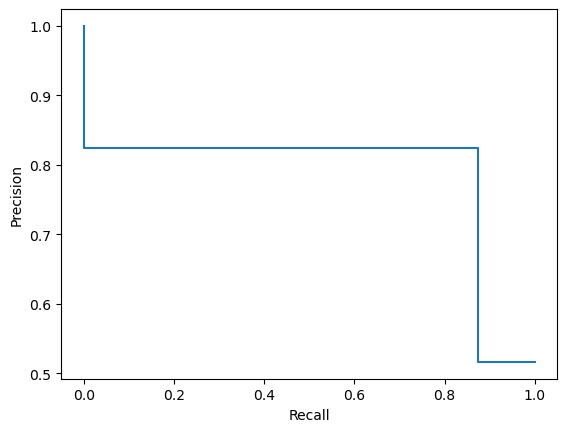

In [58]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

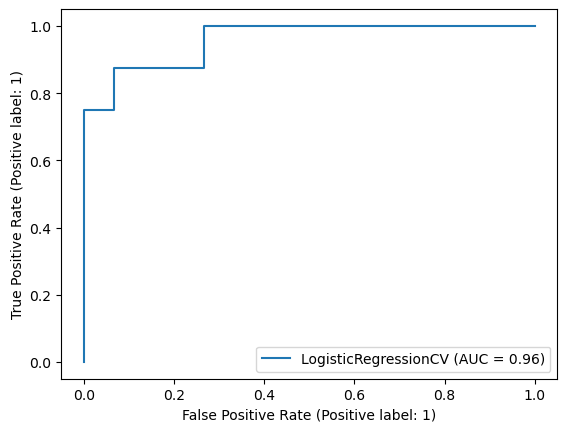

In [64]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)

**------------------------------------------------------------------------------------------------------------------------------------------------**

**------------------------------------------------------------------------------------------------------------------------------------------------**

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [72]:
patient_1 = [[ 48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]]

In [73]:
log_model.predict(patient_1)

array([0], dtype=int64)

In [75]:
log_model.predict_proba(patient_1)

array([[0.98646, 0.01354]])

In [68]:
patient_2 = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [69]:
log_model.predict(patient_2)

array([0], dtype=int64)

In [70]:
log_model.predict_proba(patient_2)

array([[9.99999862e-01, 1.38455917e-07]])